In [69]:
from selenium import webdriver
from selenium.webdriver.support.select import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC

from selenium.webdriver.chrome.options import Options

import os
import sys
from selenium import webdriver

taggerGitDir = '/Users/blakeforland/WORKING/py3env/projects/dihiggs/'
sys.path.insert(0, taggerGitDir+'utils/')

import ml_analysis_plotting

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
player_urls = ["samuryon%234291787",
               "P--daddyyy%237756679",
               "Iron%236056064",
               "Mrprowestie%239586768",
              "jackfragss",
             'ScummN%235785463',
             'quaisy%239358666',
               'StoneMountain64',
               'Fugglet%236084463',
              'Huskerrs',
              'metaphor%237891200']#,
               #'JGOD%234105923']#,
              #'ZLaner%231347']

In [ ]:
regulare = ['Jgomez']

In [3]:
player_urls = [
             'Kimsteaksauce',
             'Otter',
             'JustLawlyTTV',
             'Bonq',
             'Vincent',
             'JGOD',
             'Fifakill',
             'DiazBiffle',
             'Iron',
             'Sparxville',
             'savage__g__',
             'Swagg',
             'TimTheTatman',
             'Nickmercs',
             'Zlaner',
             'Fugglet',
             'Wysymo_',
             'WEENER69',
             'Cloakzy',
             'JoeWo',
             'Scump',
             'AydaN','ALilSlapanPickle','Huskerrs','Symfuhny','Tfue','TheseKnivesOnly','K3']

In [68]:
'''
PROJECT_ROOT = os.path.abspath(os.path.dirname('.'))
DRIVER_BIN = os.path.join(PROJECT_ROOT, "/Users/blakeforland/Downloads/chrome/chromedriver")

browser = webdriver.Chrome(executable_path = DRIVER_BIN)

trn_atvi_url = "https://cod.tracker.gg/warzone/profile/atvi/"

browser.get(trn_atvi_url+player+'/detailed')
    
career_elements = browser.find_elements_by_class_name("secondary")

print(career_elements)
'''

'\nPROJECT_ROOT = os.path.abspath(os.path.dirname(\'.\'))\nDRIVER_BIN = os.path.join(PROJECT_ROOT, "/Users/blakeforland/Downloads/chrome/chromedriver")\n\nbrowser = webdriver.Chrome(executable_path = DRIVER_BIN)\n\ntrn_atvi_url = "https://cod.tracker.gg/warzone/profile/atvi/"\n\nbrowser.get(trn_atvi_url+player+\'/detailed\')\n    \ncareer_elements = browser.find_elements_by_class_name("secondary")\n\nprint(career_elements)\n'

In [71]:
PROJECT_ROOT = os.path.abspath(os.path.dirname('.'))
DRIVER_BIN = os.path.join(PROJECT_ROOT, "/Users/blakeforland/Downloads/chrome/chromedriver")

browser = webdriver.Chrome(executable_path = DRIVER_BIN)

trn_atvi_url = "https://cod.tracker.gg/warzone/profile/atvi/"

players = {}

for player in player_urls:
    
    print(player)
    
    temp_p = {'stats':0,'matches':0}
    
    browser.get(trn_atvi_url+player+'/overview')
    
    career_elements = browser.find_elements_by_class_name("career-stats__main")
    
    career_elements = (career_elements[0].text).split('\n')
    
    temp_p['stats'] = {'K/D':float(career_elements[10]),'Win%':float(career_elements[4][:-1]),'Wins':int(np.char.replace(career_elements[1],',',''))}
    
    browser.get(trn_atvi_url+player+'/matches')

    WebDriverWait(browser, 20)

    matches = 0

    while matches < 100:

        WebDriverWait(browser, 20)

        for button in browser.find_elements_by_class_name('trn-button'):
            if button.text == 'Load More Matches':
                #print('More matches')
                button.click()
                break

        WebDriverWait(browser, 20)

        select_element = browser.find_elements_by_class_name("match-row")

        matches = len(select_element)
    print(matches)
    matches = []
    for element in select_element:
        matches.append(element.text)
    '''
    select = Select(select_element)
    for option in select.options[1:]:
        print(option.text)

    '''
    match_df = {}
    for m,match in enumerate(select_element):
        match = match.text
        temp = match.split('\n')
        if 'BR' in temp[2]:
            if 'Buy' in temp[2]: continue
            if 'Lobby K/D' not in temp[3]: continue
            match_df[m]={'Place':int(temp[0][:-2]),'Type':temp[2],'Lobby K/D':float(temp[4]),'Dealt':float(np.char.replace(temp[6],',','')),'Taken':float(np.char.replace(temp[9],',','')),'Kills':float(temp[11]),'K/D':float(temp[13])}
        #elif 'Resurgence' in temp[2]:
        #    if temp[3] == 'Lobby K/D':
        #        match_df[m]={'Place':int(temp[0][:-2]),'Type':temp[2],'Lobby K/D':float(temp[4]),'Dealt':float(np.char.replace(temp[6],',','')),'Taken':float(np.char.replace(temp[9],',','')),'Kills':float(temp[11]),'K/D':float(temp[13])}
        #else: continue

    temp_p['matches'] = pd.DataFrame(match_df)
    
    players[player] = temp_p
    
browser.quit()

samuryon%234291787
100
P--daddyyy%237756679
100
Iron%236056064
100
Mrprowestie%239586768
100
jackfragss
100
ScummN%235785463
100
quaisy%239358666
100
StoneMountain64
100
Fugglet%236084463
100
Huskerrs
100
metaphor%237891200
100


In [72]:
players = pd.DataFrame(players)

In [73]:
lobbies = []
error = []
mins = []
maxs = []
kds = []
for player in player_urls:
    print(player)
    if len(players[player]['matches']) == 0: continue
    lobbies.append(players[player]['matches'].loc['Lobby K/D'].median())
    error.append(players[player]['matches'].loc['Lobby K/D'].std())
    mins.append(players[player]['matches'].loc['Lobby K/D'].min())
    maxs.append(players[player]['matches'].loc['Lobby K/D'].max())
    kds.append(players[player]['stats']['K/D'])

samuryon%234291787
P--daddyyy%237756679
Iron%236056064
Mrprowestie%239586768
jackfragss
ScummN%235785463
quaisy%239358666
StoneMountain64
Fugglet%236084463
Huskerrs
metaphor%237891200


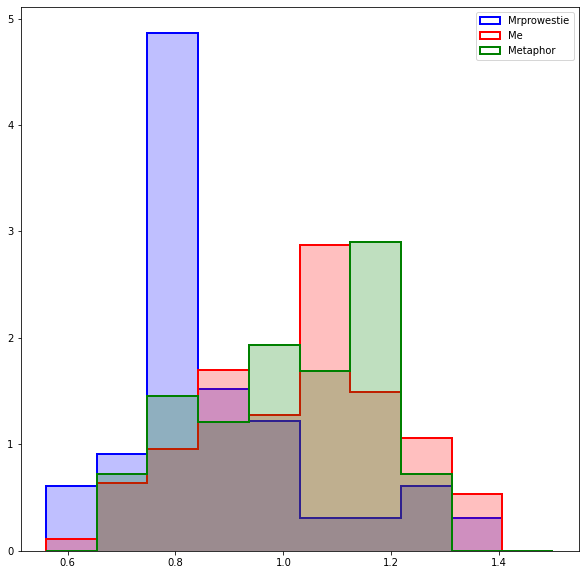

In [91]:
fig,ax=plt.subplots(figsize=(10,10))
xmax=1.5
_=plt.hist(players['Mrprowestie%239586768']['matches'].loc['Lobby K/D'].to_numpy(),range=(np.min(mins),xmax),bins=10,histtype='step',density=True,linewidth=2,color='blue',label='Mrprowestie')
_=plt.hist(players['Mrprowestie%239586768']['matches'].loc['Lobby K/D'].to_numpy(),range=(np.min(mins),xmax),bins=10,density=True,linewidth=2,alpha=.25,color='blue')
_=plt.hist(players['metaphor%237891200']['matches'].loc['Lobby K/D'].to_numpy(),range=(np.min(mins),xmax),bins=10,histtype='step',density=True,linewidth=2,color='red',label='Me')
_=plt.hist(players['metaphor%237891200']['matches'].loc['Lobby K/D'].to_numpy(),range=(np.min(mins),xmax),bins=10,density=True,linewidth=2,color='red',alpha=.25)
_=plt.hist(players['samuryon%234291787']['matches'].loc['Lobby K/D'].to_numpy(),range=(np.min(mins),xmax),bins=10,histtype='step',density=True,linewidth=2,color='green',label='Metaphor')
_=plt.hist(players['samuryon%234291787']['matches'].loc['Lobby K/D'].to_numpy(),range=(np.min(mins),xmax),bins=10,density=True,linewidth=2,color='green',alpha=.25)
plt.legend()

In [75]:
l = []
for p,player in enumerate(player_urls):
    for i in range(len(players[player]['matches'].loc['Lobby K/D'])):
        l.append((p,players[player]['matches'].loc['Lobby K/D'].iloc[i]))

In [90]:
'''
H, xedges, yedges = np.histogram2d(np.array(l)[:,0],np.array(l)[:,1],bins=10)
H_norm_rows = H / H.max(axis=1, keepdims=True)
#Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero
plt.pcolormesh(xedges,yedges,H_norm_rows.T)

#cbar = plt.colorbar()
#cbar.ax.set_ylabel('Counts')  

plt.show()

np.random.seed(19680801)

#%matplotlib notebook
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

colors = ['r', 'g', 'b', 'y']
for k in range(10):
    # Generate the random data for the y=k 'layer'.
    xs = yedges
    ys = xedges

    # You can provide either a single color or an array with the same length as
    # xs and ys. To demonstrate this, we color the first bar of each set cyan.
    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    ax.bar(xs[:-1], H_norm_rows[k,:], zs=np.ones((10))*k, zdir='y', alpha=0.8,width=.17)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# On the y axis let's only label the discrete values that we have data for.
#ax.set_yticks(yticks)

plt.show()
'''

"\nH, xedges, yedges = np.histogram2d(np.array(l)[:,0],np.array(l)[:,1],bins=10)\nH_norm_rows = H / H.max(axis=1, keepdims=True)\n#Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero\nplt.pcolormesh(xedges,yedges,H_norm_rows.T)\n\n#cbar = plt.colorbar()\n#cbar.ax.set_ylabel('Counts')  \n\nplt.show()\n\nnp.random.seed(19680801)\n\n#%matplotlib notebook\nfig = plt.figure(figsize=(10,10))\nax = fig.add_subplot(projection='3d')\n\ncolors = ['r', 'g', 'b', 'y']\nfor k in range(10):\n    # Generate the random data for the y=k 'layer'.\n    xs = yedges\n    ys = xedges\n\n    # You can provide either a single color or an array with the same length as\n    # xs and ys. To demonstrate this, we color the first bar of each set cyan.\n    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.\n    ax.bar(xs[:-1], H_norm_rows[k,:], zs=np.ones((10))*k, zdir='y', alpha=0.8,width=.17)\n\nax.set_xlabel('X')\nax.set_ylabel('Y')\nax.set_zlabel('Z')\n\n# On the y ax

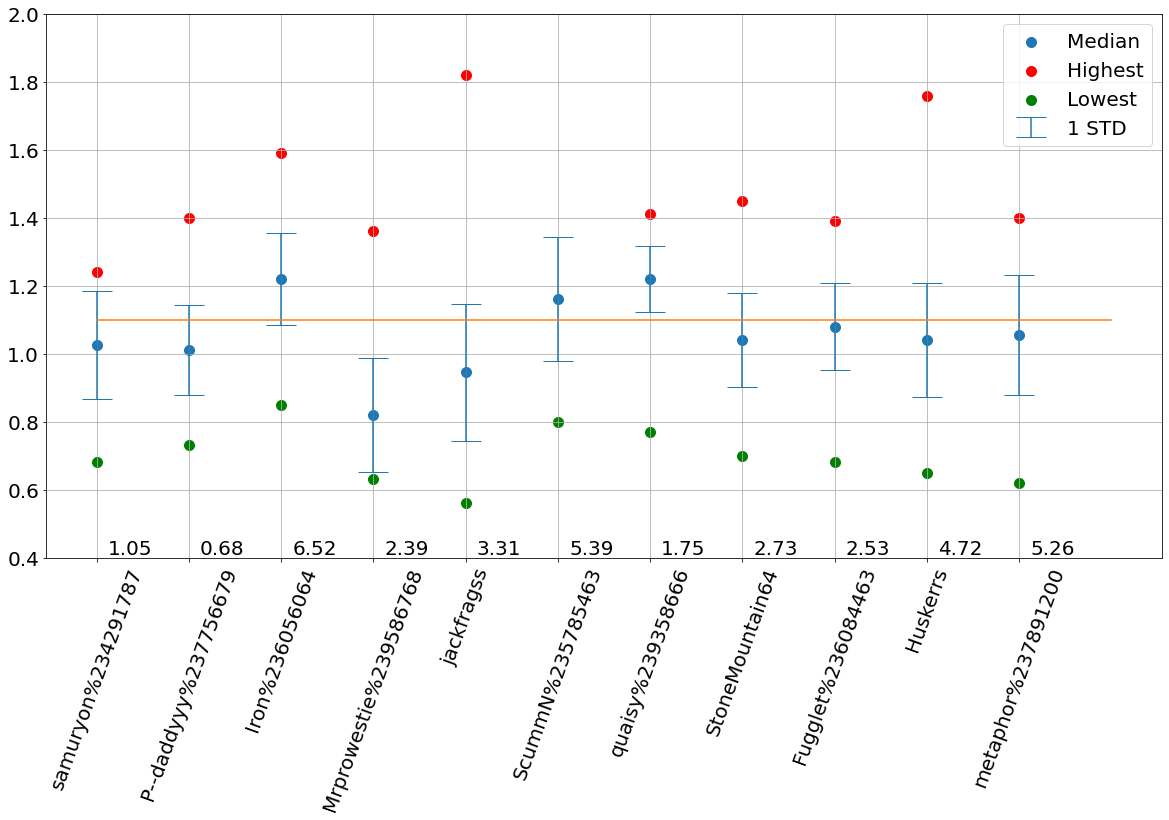

In [84]:
fig,ax=plt.subplots(figsize=(20,10))
plt.scatter(players.keys(),lobbies,label='Median',s=100)
#plt.text(players.keys(),lobbies,color='black')
plt.scatter(players.keys(),maxs,color='red',label='Highest',s=100)
plt.scatter(players.keys(),mins,color='green',label='Lowest',s=100)
plt.errorbar(players.keys(),lobbies,yerr=error,ls='',label='1 STD',capsize=15)
plt.plot((0,len(players.keys())),(1.1,1.1))
plt.xticks(rotation = 70,fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0.4,2.)

plt.grid()

for i in range(len(players.keys())):
    plt.text(i+.12,.41,str(kds[i]),fontsize=20)
plt.legend(fontsize=20)